<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Object Recognition    
</div>



* Object recognition in image processing refers to the task of identifying and classifying the objects within digital images or video frames.

* It involves the use of computer vision techniques and machine learning algorithms to automatically detect and recognize objects of interest in visual data.

In [9]:
import warnings
warnings.filterwarnings('ignore')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 Region based Convolutional Neural Networks for Object Recognition (R-CNN)
 <br>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>

* The R-CNN was described in the 2014 paper by Ross Girshick, et al, from UC Berkeley titled "Rich feature hiearchies for accurate object detction and semantic segmentation.

* It may have been one of the first large and successful application of convolution neural networks to the problem of object localization, detction, and segmentation.

* The approach was demonstrated on benchmark datasets, achieving then state-of-the-art results on the VOC-2012 dataset and the 200-class ILSVRC-2013 object detection dataset.


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 Fast R-CNN
 <br>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>

* Fast R-CNN was introduced in the 2015 paper by Ross Girshick titled "Fast R-CNN."

* It improves upon R-CNN by training a single network for classification and bounding box regression, making it faster and more efficient.

* It uses a Region of Interest (RoI) pooling layer to process proposals, reducing the need to run CNN for each region.

* Demonstrated significant speedups compared to R-CNN and achieved better accuracy on PASCAL VOC datasets.



<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 Faster R-CNN
 <br>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>
* Faster R-CNN was introduced in 2015 by Shaoqing Ren, et al., in the paper "Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks."

* It integrates a Region Proposal Network (RPN) directly into the object detection pipeline, eliminating the need for external proposal generation.

* The RPN shares convolutional layers with the detection network, enabling end-to-end training.

* Achieved state-of-the-art results with reduced computational costs, making it suitable for real-time applications.


In [7]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Loading the Faster R-CNN model 
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval() # Set the model to evaluation mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [16]:
#  Function to load image
def load_image(image):
    image = Image.open(image)

    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    return transform(image).unsqueeze(0)    # Add a batch dimension

load_image('content/images/dog.jpg')

tensor([[[[0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6353, 0.6314],
          [0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6392, 0.6353],
          [0.6510, 0.6549, 0.6549,  ..., 0.6431, 0.6431, 0.6392],
          ...,
          [0.3961, 0.3922, 0.3961,  ..., 0.4745, 0.4667, 0.4627],
          [0.3922, 0.3882, 0.3843,  ..., 0.4706, 0.4706, 0.4706],
          [0.3882, 0.3882, 0.3882,  ..., 0.4667, 0.4706, 0.4745]],

         [[0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7176, 0.7137],
          [0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7216, 0.7176],
          [0.7373, 0.7412, 0.7412,  ..., 0.7255, 0.7255, 0.7216],
          ...,
          [0.4824, 0.4784, 0.4824,  ..., 0.4863, 0.4784, 0.4745],
          [0.4784, 0.4745, 0.4706,  ..., 0.5020, 0.4902, 0.4902],
          [0.4745, 0.4745, 0.4745,  ..., 0.5020, 0.5020, 0.4941]],

         [[0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4549, 0.4510],
          [0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4588, 0.4549],
          [0.4824, 0.4863, 0.4863,  ..., 0

In [18]:
# Function for prediction
def predict(image):
    image_tensor = load_image(image)
    with torch.no_grad():
        prediction = model(image_tensor)
    return prediction

In [64]:
COCO_INSTANCE_CATEGORY_NAMES = [
'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [80]:
# Visualizeing the Results of Image Detectiond
def visualize_predictions(image, prediction):
    image = plt.imread(image)
    plt.imshow(image)
    
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']
    
    keep = scores > 0.5
    boxes = boxes[keep]
    labels = labels[keep] 
    scores = scores[keep]

    # Visualize the bounding boxes
    for box, ls in zip(boxes, zip(labels, scores)):
         box = box.cpu().numpy()
         label , score = ls
         x1, y1, x2, y2 = box
         plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', lw=2),
         )
         plt.text(x1, y1-4, f'{COCO_INSTANCE_CATEGORY_NAMES[label.numpy()]} - {score*100:.2f}%', fontsize=12, color='red') 
    plt.show()


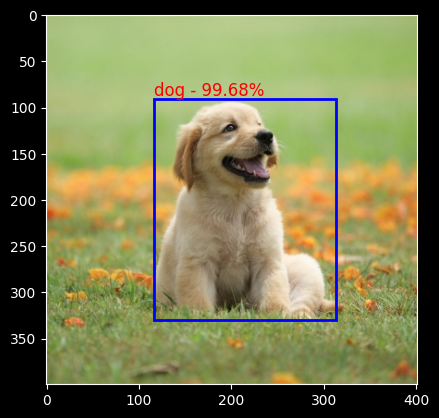

In [81]:
image_path = 'content/images/dog.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)

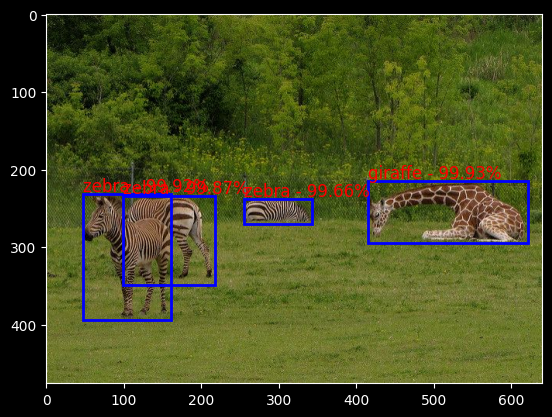

In [82]:
image_path = 'content/images/jungle.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)


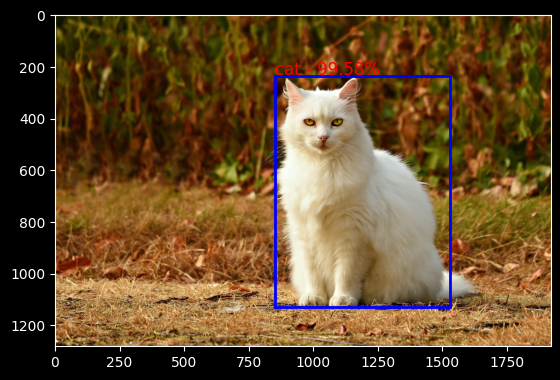

In [83]:
image_path = 'content/images/cat.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 Mask R-CNN
 <br>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>

* Mask R-CNN was introduced in the 2017 paper by Kaiming He, et al., titled "Mask R-CNN."

* It extends Faster R-CNN by adding a branch for predicting object masks in parallel with bounding box regression and classification.

* Achieved state-of-the-art results in instance segmentation tasks while maintaining high accuracy in object detection.

* Widely used for tasks requiring pixel-level accuracy, such as autonomous driving and medical image analysis.



In [84]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Loading the Faster R-CNN model 
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval() # Set the model to evaluation mode

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/dai/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100.0%


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [86]:
#  Function to load image
def load_image(image):
    image = Image.open(image)

    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    return transform(image).unsqueeze(0)    # Add a batch dimension

load_image('content/images/dog.jpg')

tensor([[[[0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6353, 0.6314],
          [0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6392, 0.6353],
          [0.6510, 0.6549, 0.6549,  ..., 0.6431, 0.6431, 0.6392],
          ...,
          [0.3961, 0.3922, 0.3961,  ..., 0.4745, 0.4667, 0.4627],
          [0.3922, 0.3882, 0.3843,  ..., 0.4706, 0.4706, 0.4706],
          [0.3882, 0.3882, 0.3882,  ..., 0.4667, 0.4706, 0.4745]],

         [[0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7176, 0.7137],
          [0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7216, 0.7176],
          [0.7373, 0.7412, 0.7412,  ..., 0.7255, 0.7255, 0.7216],
          ...,
          [0.4824, 0.4784, 0.4824,  ..., 0.4863, 0.4784, 0.4745],
          [0.4784, 0.4745, 0.4706,  ..., 0.5020, 0.4902, 0.4902],
          [0.4745, 0.4745, 0.4745,  ..., 0.5020, 0.5020, 0.4941]],

         [[0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4549, 0.4510],
          [0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4588, 0.4549],
          [0.4824, 0.4863, 0.4863,  ..., 0

In [89]:
# Function for prediction
def predict(image):
    image_tensor = load_image(image)
    with torch.no_grad():
        prediction = model(image_tensor)
    return prediction

In [90]:
COCO_INSTANCE_CATEGORY_NAMES = [
'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [116]:
# Visualizeing the Results of Image Detectiond
def visualize_predictions(image, prediction):
    image = plt.imread(image)
    plt.imshow(image)
    
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']
    masks = prediction[0]['masks']

    keep = scores > 0.5
    boxes = boxes[keep]
    labels = labels[keep] 
    scores = scores[keep]
    masks = masks[keep]
    
    
    # Visualize the bounding boxes
    for box, label, score, mask in zip(boxes, labels, scores, masks):
         box = box.cpu().numpy()
         x1, y1, x2, y2 = box
         plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', lw=2),
         )
         plt.text(x1, y1-4, f'{COCO_INSTANCE_CATEGORY_NAMES[label.numpy()]} - {score*100:.2f}%', fontsize=12, color='red')

         # Visualize the mask
         mask = mask[0].cpu().numpy() 
         mask = mask > 0.5
         plt.imshow(mask, alpha=0.6)
    plt.show()

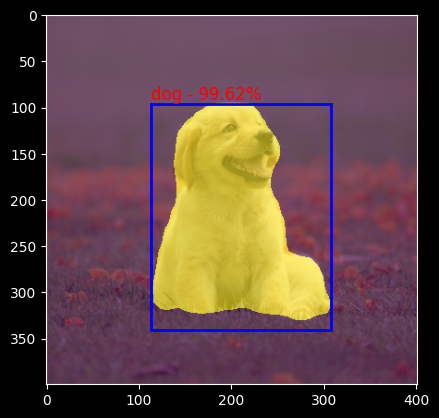

In [117]:
image_path = 'content/images/dog.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)

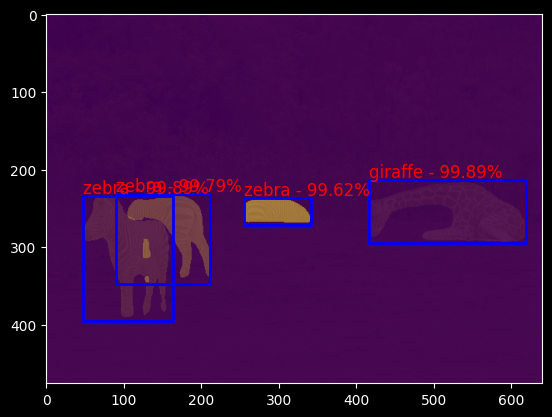

In [104]:
image_path = 'content/images/jungle.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)


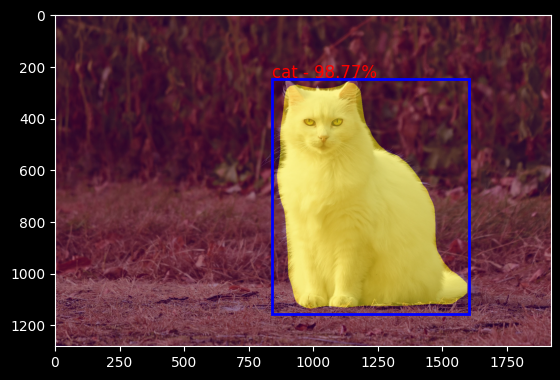

In [105]:
image_path = 'content/images/cat.jpg'
predictions = predict(image_path)
image = visualize_predictions(image_path, predictions)



<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 YOLO (You Only Look Once)
 <br>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>

* YOLO was introduced in the 2016 paper by Joseph Redmon, et al., titled "You Only Look Once: Unified, Real-Time Object Detection."

* Unlike R-CNN models, YOLO frames object detection as a single regression problem, predicting bounding boxes and class probabilities simultaneously.

* It processes the entire image in one forward pass, achieving real-time speeds with reasonable accuracy.

* Successive versions (YOLOv2, YOLOv3, etc.) have improved speed, accuracy, and scalability.

In [1]:
import cv2 
import torch
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /home/dai/.cache/torch/hub/ultralytics_yolov5_master


  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 6.2 MB/s eta 0:00:00
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 4.7 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/dai/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.8s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️

YOLOv5 🚀 2024-12-28 Python-3.12.7 torch-2.5.1+cu124 CPU

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
# Loading the image
def load_image(image):
    image = Image.open(image)
    return image

In [23]:
def predict(image):
    # Load the image
    image = load_image(image)

    # run the model
    results = model(image)

    # print the detection objects
    print('Detected Object:', '  '.join(results.names.values()))
    
    # show the image with the detections and save the image
    results.show()
    results.save()

/home/dai/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected Object: person  bicycle  car  motorcycle  airplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  couch  potted plant  bed  dining table  toilet  tv  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush


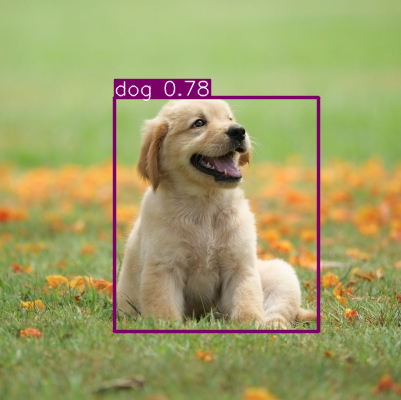

Saved 1 image to runs/detect/exp5


In [24]:
image_path = 'content/images/dog.jpg'
predict(image_path)

/home/dai/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected Object: person  bicycle  car  motorcycle  airplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  couch  potted plant  bed  dining table  toilet  tv  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush


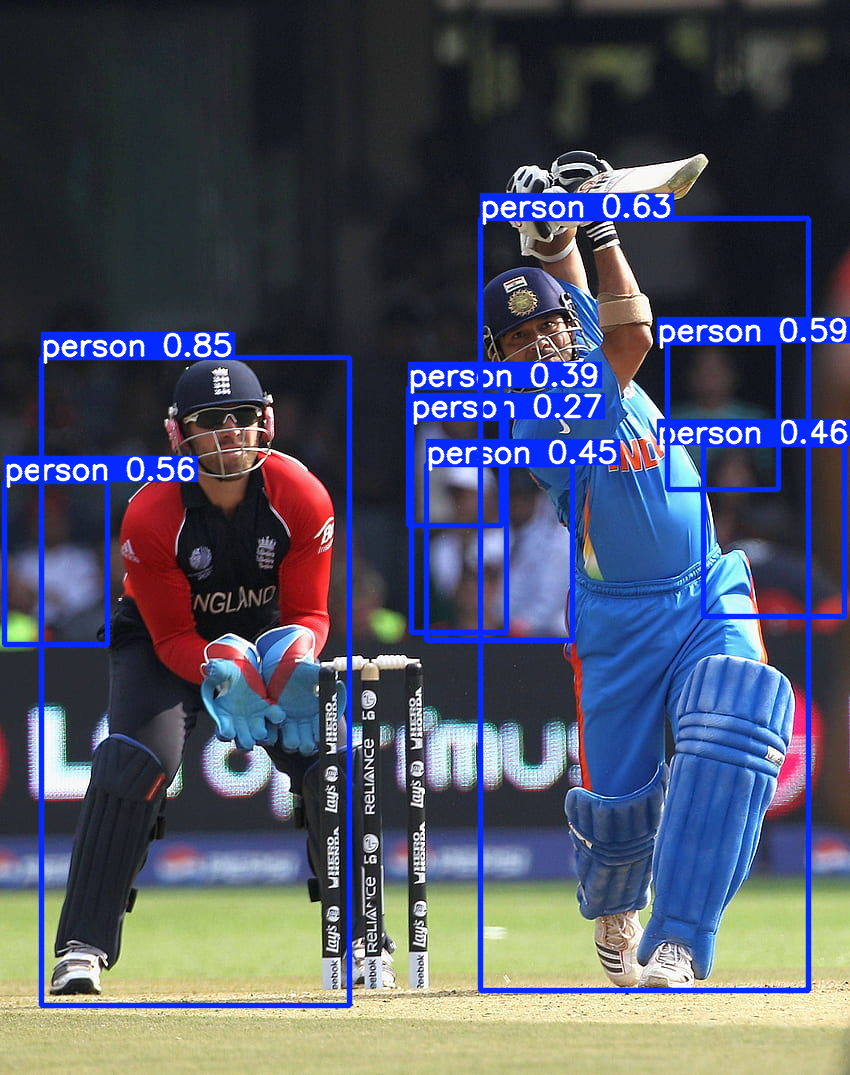

Saved 1 image to runs/detect/exp6


In [25]:
image_path = 'content/images/sachin.jpg'
predict(image_path)